# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: Yajur Vashisht

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [75]:
# TO DO: Import concrete dataset from yellowbrick library

from yellowbrick.datasets import load_concrete

X, y = load_concrete()

# TO DO: Print size and type of X and y

print(X.shape)
X.dtypes
print(y.shape)
y.dtypes

(1030, 8)
(1030,)


dtype('float64')

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X training shape: ", X_train.shape)
print("X testing shape: ", X_test.shape)
print("y training size: ", y_train.shape)
print("y testing size: ", y_test.shape)


X training shape:  (824, 8)
X testing shape:  (206, 8)
y training size:  (824,)
y testing size:  (206,)


### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

In [77]:
# Importing decision tree, random forest, and gradient boosting
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate Decision Tree with max_depth=5
decision_tree_model = DecisionTreeRegressor(max_depth=5, random_state=0)

# Instantiate Random Forest with max_depth=5
# Additional parameters include n_estimators
random_forest_model = RandomForestRegressor(max_depth=5, random_state=0, max_features='sqrt', n_estimators=100)  

# Instantiate Gradient Boosting with max_depth=5
# Additional parameters include n_estimators
gradient_boosting_model = GradientBoostingRegressor(max_depth=5, random_state = 0, n_estimators=100)

decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=0)

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

In [78]:
# Calculating the average training and validation accurary with MSE and cross validation

from sklearn.model_selection import cross_validate

# Decision Tree 
decision_tree_score = cross_validate(decision_tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Random Forest 
random_forest_score = cross_validate(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Gradient Boosting 
gradient_boosting_score = cross_validate(gradient_boosting_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)


### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [79]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

pd.options.display.float_format = '{:.3f}'.format
results = pd.DataFrame({
    'Training Accuracy': [-decision_tree_score['train_score'].mean(), -random_forest_score['train_score'].mean(), -gradient_boosting_score['train_score'].mean()], 
                        'Validation Accuracy': [-decision_tree_score['test_score'].mean(), -random_forest_score['test_score'].mean(), -gradient_boosting_score['test_score'].mean()]}
, index=['DT', 'RF', 'GB'])

print(results)

    Training Accuracy  Validation Accuracy
DT             47.823               74.045
RF             49.159               67.723
GB              3.694               23.547


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [80]:
# TO DO: ADD YOUR CODE HERE

# Decision Tree 
decision_tree_r2 = cross_validate(decision_tree_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

# Random Forest 
random_forest_r2 = cross_validate(random_forest_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

# Gradient Boosting 
gradient_boosting_r2 = cross_validate(gradient_boosting_model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

In [81]:
pd.options.display.float_format = None
results_r2 = pd.DataFrame({
    "Training Accuracy": [decision_tree_r2['train_score'].mean(), random_forest_r2['train_score'].mean(), gradient_boosting_r2['train_score'].mean()],
    "Validation Accuracy": [decision_tree_r2['test_score'].mean(), random_forest_r2['test_score'].mean(), gradient_boosting_r2['test_score'].mean()]
}, index=['DT', 'RF', 'GB'])

print(results_r2)

    Training Accuracy  Validation Accuracy
DT           0.830437             0.735184
RF           0.825750             0.758736
GB           0.986903             0.916155


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

*ANSWER HERE*

1. The results in this assignment with a Decision Tree, Random Forest, and Gradient Boosting models differ from the previous lab in various ways such as: 

    - For Mean Squared Error (MSE), all three tree-based models (DT, RF, GB) outperform the linear regression model. This means that they exhibit lower errors in predicting the target variable. This indicates better performance for minimizing prediction error.
    - For R2 score, the Gradient Booosting model performs well, with an R2 score of 91.62. However, it might be overfitting, due to the huge discrepancy between training and validation accuracy. The Random Forest and Decision Tree models have a better balance between training and validation accuracy.

2. The model I would select for the concrete dataset would be the Gradient Boosting model because compared to the other models used it provides a good training accuracy and crucially a good validation accuracy. This demonstrates the model is not overfitting and is adequately equipped to predict values.

3. To increasee the accuracy of the tree-based models used in the assignment we can:

- The dataset can be pre-pruned by selecting the max_depth and max_leaf_nodes. 
- The dataset can also be pre-vetted to ensure outliers have been removed, allowing for more accurate predictions.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. My code was sourced from the linear regression and linear classification example that we went over in class along with the regression metrics example we did. All the steps were similar.

2. The steps were completed in the order they were presented in the assignment itself. For parts that I got stuck on I moved on to the second problem and vice versa until I was able to work through all of the problems.

3. Generative AI was not used for any coding itself I used it for some of the error codes I was getting and I asked it if I was categorizing my models correctly because I kept confusing them since we were working with three at a time in the first exercise.

4. I don't think there were any real challenges, with machine learning the steps are always the same. Only the interpretation of the models that we will be using changes but the coding itself is straightforward. I find that the coding is not difficult, it's the interpretation of the models and the stats the models produce are difficult to keep straight.

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [82]:
# TO DO: Import wine dataset

# Download the Wine dataset from UCI and define column headers
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_headers = ["class", "Alcohol", "Malicacid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols",
                  "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue",
                  "0D280_0D315_of_diluted_wines", "Proline"]
wine_df = pd.read_csv(url, names=column_headers)

# Split the dataset into X and y
X = wine_df.drop("class", axis=1)
y = wine_df["class"]

# Print the size and type of X and y
print("X shape:", X.shape)
print("X type:", X.dtypes)
print("y shape:", y.shape)
print("y type:", y.dtypes)

X shape: (178, 13)
X type: Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
dtype: object
y shape: (178,)
y type: int64


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [83]:
# TO DO: ADD YOUR CODE HERE

print("X first 5 rows: \n", X.head(5))
print("\ny first 5 rows: \n", y.head(5))

X first 5 rows: 
    Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0    14.23       1.71  2.43               15.6        127           2.80   
1    13.20       1.78  2.14               11.2        100           2.65   
2    13.16       2.36  2.67               18.6        101           2.80   
3    14.37       1.95  2.50               16.8        113           3.85   
4    13.24       2.59  2.87               21.0        118           2.80   

   Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   0D280_0D315_of_diluted_wines  Proline  
0      

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [84]:
# TO DO: ADD YOUR CODE HERE

missing_x_values = X.isna().sum()
missing_y_values = y.isna().sum()


print("Number of missing X values: \n", missing_x_values)
print("Number of missing y values: \n", missing_y_values)

Number of missing X values: 
 Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64
Number of missing y values: 
 0


How many samples do we have of each type of wine?

In [85]:
# TO DO: ADD YOUR CODE HERE

wine_counts = y.value_counts()
print("The number samples we have of each type of wine are: \n", wine_counts)

The number samples we have of each type of wine are: 
 2    71
1    59
3    48
Name: class, dtype: int64


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

In [86]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

svc_model = SVC()
dt_model = DecisionTreeClassifier(max_depth=3, random_state=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the models to the training data
svc_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [87]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

# First for the training set

# SVC Model training set
svc_model_score = cross_validate(svc_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

# Decision Tree training set
dt_model_score = cross_validate(dt_model, X_train, y_train, cv=5, scoring='accuracy', return_train_score=True)

pd.options.display.float_format = '{:.3f}'.format

results = pd.DataFrame({
    "Number of Samples": [X_train.shape[0], X_test.shape[0]],
    "SVC": [svc_model_score['train_score'].mean(), dt_model_score['train_score'].mean()],
    "Decision Tree": [svc_model_score['test_score'].mean(), dt_model_score['test_score'].mean()]
}, index=['Training', 'Validation'])

print(results)

            Number of Samples   SVC  Decision Tree
Training                  142 0.673          0.649
Validation                 36 0.993          0.922


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

Text(170.97222222222223, 0.5, 'true value')

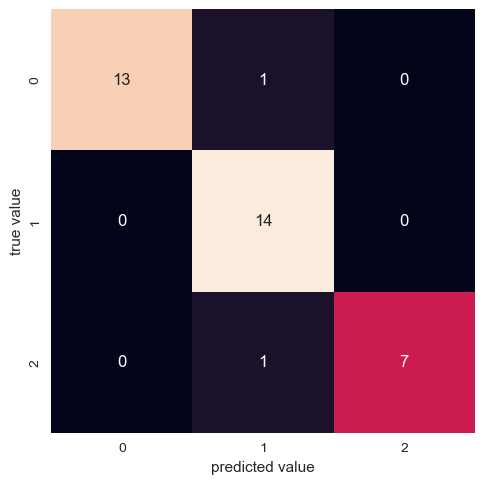

In [88]:
# TO DO: Implement best model
# TO DO: Print confusion matrix using a heatmap

from sklearn.metrics import confusion_matrix, classification_report

prediction = dt_model.predict(X_test)
mat = confusion_matrix(y_test, prediction)

sns.heatmap(mat, square = True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [89]:
# TO DO: Print classification report

print(classification_report(y_test, prediction, target_names=["1", "2", "3"], zero_division=0))

              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.88      1.00      0.93        14
           3       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

1. The training and validation accuracy changed based on whether the Decision Tree or Support Vector Machine was used. The training accuracy for the decision tree was 64.9% versus 67.3% for SVC. The validation accuracy followed the same pattern, the decision tree validation accuracy was 92.2% versus 99.3%. These accuracy values are negated, so higher values indicate better performance. The SVC model had higher accuracy in both the training and validation sets, thus, making it the better-performing model in this context.

2. The support vector machines model did not work as well as the tree-based models because tree-based models work well when there are features with different scales, or a mix of binary and continuous features. SVC models also need to have C and gamma specified, but we have not done either. 

3. The following were incorrectly classified in Step 5.2:
    - Class 1: 1 sample was incorrectly classified
    - Class 2: 0 samples were incorrectly classified
    - Class 3: 1 sample was incorrectly classified
    
    Therefore, a total of 2 samples were incorrectly classified.
    
4. Precision is the ratio of true positive predictions to the total predicted positives. It is important when the cost of false positives is high. Recall is the ratio of true positive predictions to the total actual positives. It is crucial when it is costly to miss positive samples. In this context, recall measures how many of the actual positive samples were correctly identified. Therefore, in the wine dataset example, it is more important to prioritize Precision.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. My code was sourced from the linear regression example that we went over in class along with the regression metrics, decision tree, and SVM examples we did. I also used a lot of the previous assignment to reference how to set up a lot of the same steps that we do every time we do machine learning.

2. The steps were completed in the order they were presented in the assignment itself. For parts that I got stuck on I moved on to the second problem and vice versa until I was able to work through all of the problems very sequentially I would say. I also find for machine learning since the five steps are always the same it is just easier to use the same methodology and go from step one to five in order.

3. Generative AI was not used for any part of Question Two

4. I don't think there were any real challenges, the nice thing with machine learning is that the steps are always the same and if you're following them not much changes besides the interpretation of the models that we will be using but the coding itself is pretty straightforward. We've done it almost three times now and we do it in all the labs so I find that the coding is not the hard part it's the interpretation of the models and the stats from the models are difficult to keep straight.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

Model Evaluation: In classification, precision, recall, and F1-score provide valuable insights into model performance. The Decision Tree model displayed high precision, recall, and F1-score for each class, indicating its ability to classify wine samples accurately.

Model Performance: In the first regression task, the tree-based models (Decision Tree, Random Forest, Gradient Boosting) outperformed the linear regression model. This indicates their ability to capture complex relationships in the data. In the classification task, the Decision Tree model showed better accuracy compared to the Support Vector Machine (SVM) model, highlighting the importance of selecting models that match the dataset's characteristics.

Sensitivity to Dataset Characteristics: The choice of the most suitable model depends on the dataset's characteristics. Tree-based models are effective when dealing with non-linear and complex data, while SVMs may perform better on linearly separable data. It's important to consider the nature of the dataset when selecting a machine learning algorithm.

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

The part of the assignment that I really enjoyed was using different models and seeing how they interact with data differently. I disliked also using those multiple models because some of the lines of code started to look the same after a while and it was really hard to differentiate. What I found very interesting about this was being able to use data sets that are seemingly mundane an create interesting models and observations via the models to learn more about what seems like very boring data. I found it challenging working with so many of them at a certain time but it was also very motivating when I finally got codes to run an I could compare what was going on between each model. I also needed a few minutes when my confusion matrix came out as three by three because I was expecting something two by two like the example in class without realizing that I have three classes in the wine data set.

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

In [90]:
# TO DO: ADD YOUR CODE HERE

In [91]:
#ANSWER HERE

from sklearn.svm import LinearSVC

linear_svc_model = LinearSVC(max_iter=5000)
linear_svc_model.fit(X_train, y_train)

linear_svc_train = -cross_val_score(linear_svc_model, X_train, y_train, scoring='accuracy', cv=5)

linear_svc_model_train_avg = linear_svc_train.mean()

linear_svc_val = -cross_val_score(linear_svc_model, X_test, y_test, scoring='accuracy', cv=5)

linear_svc_model_val_avg = linear_svc_val.mean()
pd.options.display.float_format = '{:.3f}'.format

results = pd.DataFrame({
    "Linear SVC": [linear_svc_model_train_avg, linear_svc_model_val_avg],
    "Decision Tree": [svc_model_train_avg, svc_model_val_avg]
}, index=['Training', 'Validation'])


/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yajurvashisht/opt/anaconda3/envs/ensf-ml/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of

NameError: name 'svc_model_train_avg' is not defined

The LinearSVC Model does not work well for this dataset as shown above because if the decision boundary that separates different classes in the dataset is highly non-linear, LinearSVC cannot capture the non-linearity effectively. We should use non-linear classifiers like Support Vector Machine with a kernel or decision tree-based models(like done in part two). 